In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.integrate
from matplotlib import cm
from scipy import fft
from matplotlib.animation import FuncAnimation, PillowWriter 
import pandas as pd
from sklearn.linear_model import LinearRegression
import time

In [30]:
# define parameters and functions:
alpha = .4
epsilon = .1 #.1 gives things that look like solitons
L_= 2
L = np.pi*L_
V = -1
D_ = 0.6 #very intereting with D=0.5 (which is the same as Ma=1/4) and D = 0.6

In [31]:
N = 256
Nx = N
n = np.arange(N);
n[int(N/2)+1:] -= N
def RHS_static_cylinder(t,eta):
    eta_z = fft.ifft(2*n*np.pi/L*1j*fft.fft(eta))
    eta_zzz = fft.ifft((n*2*np.pi/L*1j)**3*fft.fft(eta))
    deta_dt = -1/3*fft.ifft(2*n*np.pi/L*1j*fft.fft(eta**3*(1 + D_*eta_z + epsilon**2*eta_zzz))).real
    return deta_dt

def RHS_moving_cylinder(t,eta):
    N = len(eta)
    n = np.arange(N);
    n[int(N/2)+1:] -= N
    eta_z = fft.ifft(2*n*np.pi/L*1j*fft.fft(eta))
    eta_zzz = fft.ifft((n*2*np.pi/L*1j)**3*fft.fft(eta))
    deta_dt = -1/3*fft.ifft(2*n*np.pi/L*1j*fft.fft(eta**3*(1 + D_*eta_z + epsilon**2*eta_zzz))).real
    deta_dt += - V*alpha/2*fft.ifft(2*n*np.pi/L*1j*fft.fft((1+eta/alpha)**2)).real
    return deta_dt

7


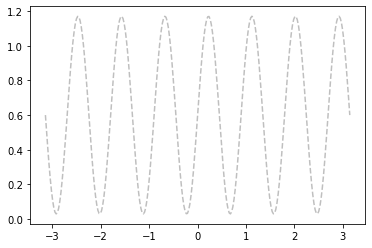

3.7699111843077517
Starting solve
(256, 300)  solved static
Time to solve 37.49036407470703 s


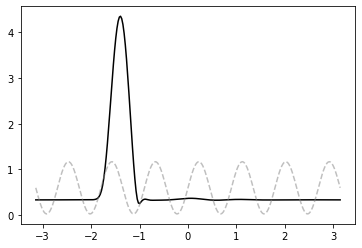

In [34]:

K = 1
T = 40
k = int(1/np.sqrt(2)/epsilon)
print(k)
z = np.linspace(-L/2, L/2, Nx)
t = np.linspace(0,T, 300)
t_span = (0,T)
u0 = (1 + np.sin(z*k)*0.95)*(1-alpha)*K
plt.plot(z,u0, '--', alpha = 0.5, color='grey', label='IC');plt.show()
print(np.trapz(u0, z))

print('Starting solve')

#result_moving = scipy.integrate.solve_ivp(RHS_moving_cylinder, t_span, u0, 'BDF', atol = 1e-2, t_eval =t)
#u_moving = result_moving.y
#print(np.shape(u_moving), ' solved moving')
st = time.time()
result_static = scipy.integrate.solve_ivp(RHS_static_cylinder, t_span, u0, 'BDF', atol = 1e-3, t_eval = t)
u_static = result_static.y
print(np.shape(u_static), ' solved static')
et = time.time()
print(f'Time to solve {et-st} s')
Z,T = np.meshgrid(z,t)
plt.plot(z, u_static[:,-1], color='black', label='Travelling wave')
plt.plot(z,u0, '--', alpha = 0.5, color='grey', label='IC');plt.show()


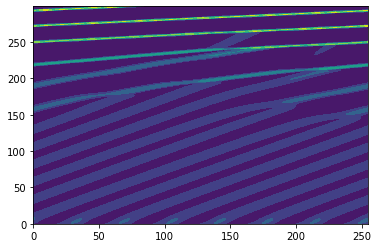

In [35]:
plt.contourf(u_static.T)

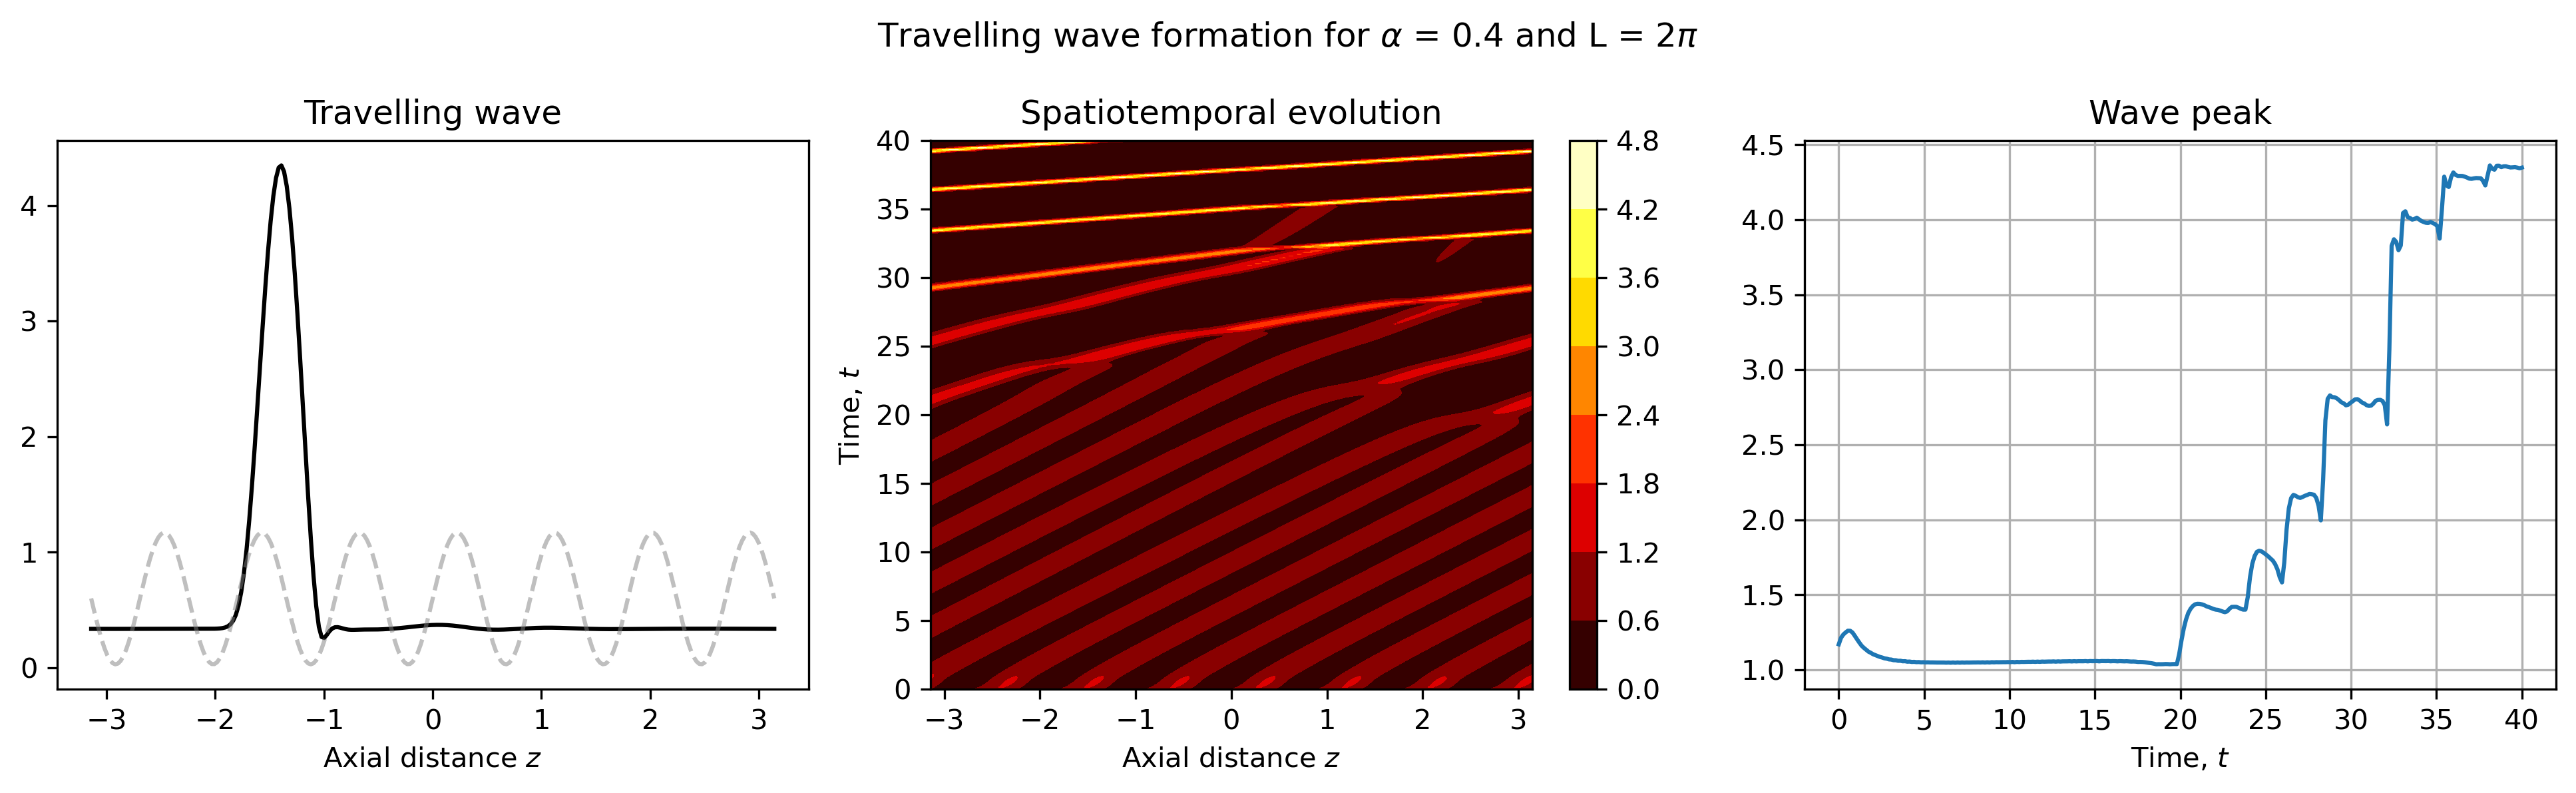

9.0
0.6
0.6010338802986156


In [36]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(13,4), dpi = 300)

#ax[0].contourf(Z,T,u_moving.T, cmap ='hot')
fig.suptitle(fr'Travelling wave formation for $\alpha$ = {alpha} and L = {L_}$\pi$')
ax[0].plot(z, u_static[:,-1], color='black', label='Travelling wave')
ax[0].plot(z,u0, '--', alpha = 0.5, color='grey', label='IC')
ax[0].set_xlabel(r'Axial distance $z$')
ax[0].set_title('Travelling wave')
c2 = ax[1].contourf(Z,T,u_static.T, cmap ='hot')
ax[1].set_title('Spatiotemporal evolution')
ax[1].set_xlabel(r'Axial distance $z$')
ax[1].set_ylabel(r'Time, $t$')
fig.colorbar(c2, ax=ax[1])
#ax[2].plot(np.trapz(u_static, z, axis=0))
ax[2].plot(t,np.max(u_static, axis=0))
ax[2].grid(True)
ax[2].set_title('Wave peak')
ax[2].set_xlabel(r'Time, $t$')
#ax[2].plot(np.trapz(u_static**2, z, axis=0))
#plt.colorbar()
plt.tight_layout()
plt.savefig(f'figures/travelling_wave_formation_L_{L_}_alpha_{alpha}.png')
plt.show()
print((1-alpha)*15)
print(np.trapz(u0,z)/L)
print(np.trapz(u_static[:,-1],z)/L)



# continuation

(256, 600)  solved static
Time to solve 76.91520881652832 s


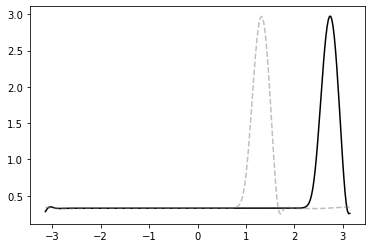

In [137]:
T=30
t = np.linspace(0,T, 600)
t_span = (0,T)

travelling_wave = u_static[:,-1]
st = time.time()
trav_progression = scipy.integrate.solve_ivp(RHS_static_cylinder, t_span, travelling_wave, 'BDF', atol = 1e-3, t_eval = t)
u = trav_progression.y
print(np.shape(u_static), ' solved static')
et = time.time()
print(f'Time to solve {et-st} s')
Z,T = np.meshgrid(z,t)
plt.plot(z, u[:,-1], color='black', label='Travelling wave')
plt.plot(z,travelling_wave, '--', alpha = 0.5, color='grey', label='IC')


In [138]:
# Stability
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(13,4), dpi = 1200)

#ax[0].contourf(Z,T,u_moving.T, cmap ='hot')
fig.suptitle(fr'Travelling wave formation for K= {K} and L = {L_}$\pi$')
ax[0].plot(z, u[:,-1], color='black', label='Travelling wave')
ax[0].plot(z,travelling_wave, '--', alpha = 0.5, color='grey', label='IC')
ax[0].set_xlabel(r'Axial distance $z$')
ax[0].set_title('Travelling wave')
c2 = ax[1].contourf(Z,T,u.T, cmap ='hot')
ax[1].set_title('Spatiotemporal evolution')
ax[1].set_xlabel(r'Axial distance $z$')
ax[1].set_ylabel(r'Time, $t$')
fig.colorbar(c2, ax=ax[1])
#ax[2].plot(np.trapz(u_static, z, axis=0))
ax[2].plot(t,np.max(u, axis=0))
ax[2].grid(True)
ax[2].set_title('Wave peak')
ax[2].set_xlabel(r'Time, $t$')
#ax[2].plot(np.trapz(u_static**2, z, axis=0))
#plt.colorbar()
plt.tight_layout()
plt.savefig(f'figures/travelling_wave_continuation_L_{L_}_alpha_{alpha}.png')
plt.show()
print((1-alpha)*15)
print(np.trapz(u0,z)/L)
print(np.trapz(u_static[:,-1],z)/L)

7.5
0.5
0.5006280322627519


(256, 600)  solved static
Time to solve 86.86680865287781 s


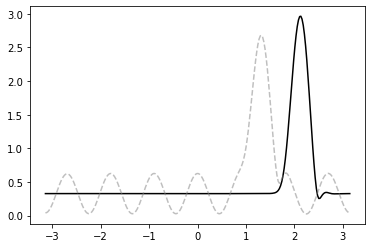

In [139]:
T=30
t = np.linspace(0,T, 600)
t_span = (0,T)

travelling_wave = u_static[:,-1] + (np.min(u_static[:,-1])+0.05)*np.cos(k*z)
st = time.time()
y_perturbed = scipy.integrate.solve_ivp(RHS_static_cylinder, t_span, travelling_wave, 'BDF', atol = 1e-3, t_eval = t)
u_perturbed = y_perturbed.y
print(np.shape(u_perturbed), ' solved static')
et = time.time()
print(f'Time to solve {et-st} s')
Z,T = np.meshgrid(z,t)
plt.plot(z, u_perturbed[:,-1], color='black', label='Travelling wave')
plt.plot(z,travelling_wave, '--', alpha = 0.5, color='grey', label='IC')


In [141]:
# Stability
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(13,4), dpi = 1200)

#ax[0].contourf(Z,T,u_moving.T, cmap ='hot')
fig.suptitle(fr'Travelling wave formation for K= {K} and L = {L_}$\pi$')
ax[0].plot(z, u_perturbed[:,-1], color='black', label='Travelling wave')
ax[0].plot(z,travelling_wave, '--', alpha = 0.5, color='grey', label='IC')
ax[0].set_xlabel(r'Axial distance $z$')
ax[0].set_title('Travelling wave')
ax[0].legend()
c2 = ax[1].contourf(Z,T,u_perturbed.T, cmap ='hot')
ax[1].set_title('Spatiotemporal evolution')
ax[1].set_xlabel(r'Axial distance $z$')
ax[1].set_ylabel(r'Time, $t$')
fig.colorbar(c2, ax=ax[1])
#ax[2].plot(np.trapz(u_static, z, axis=0))
ax[2].plot(t, np.max(u_perturbed, axis=0))
ax[2].grid(True)
ax[2].set_title('Wave peak')
ax[2].set_xlabel(r'Time, $t$')
#ax[2].plot(np.trapz(u_static**2, z, axis=0))
#plt.colorbar()
plt.tight_layout()
plt.savefig(f'figures/travelling_wave_stability_L_{L_}_alpha_{alpha}.png')
plt.show()
print((1-alpha)*15)
print(np.trapz(u0,z)/L)
print(np.trapz(u_static[:,-1],z)/L)

7.5
0.5
0.5006280322627519


MovieWriter imagemagick unavailable; using Pillow instead.


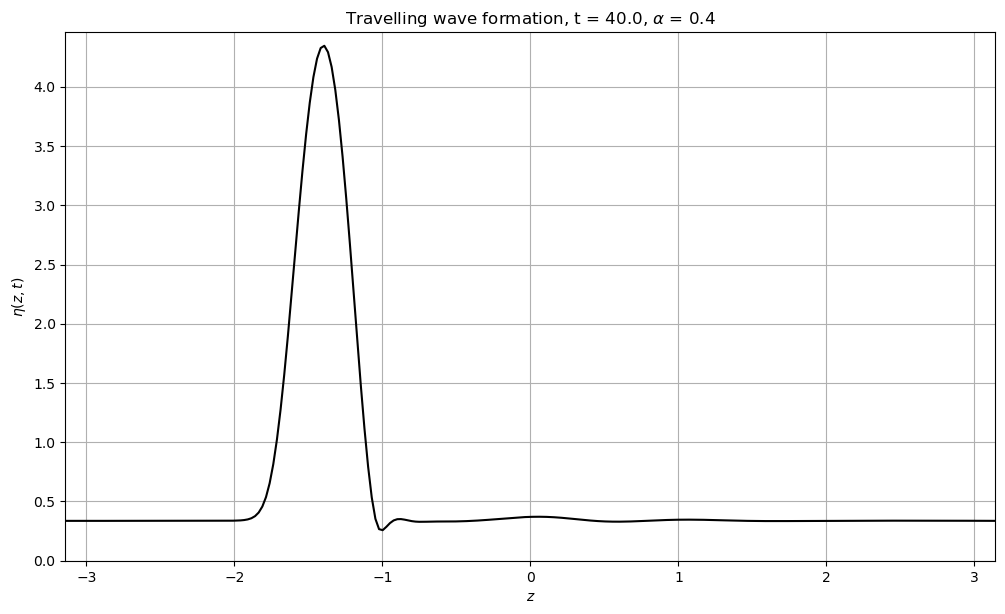

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12,7), dpi=100)

def init():
    ax.plot(z,  u_static[:,0])
def update(i):
    ax.cla()
    time = t[i]
    #print(time)
    ax.plot(z, u_static[:,i],color = 'black')
    ax.set_title(fr'Travelling wave formation, t = {round(time,2)}, $\alpha$ = {alpha}')
    ax.set_ylim([0,np.max(u_static)+0.1])
    ax.set_xlim([np.min(z), np.max(z)])
    ax.set_xlabel(r'$z$')
    ax.set_ylabel(r'$\eta(z,t)$')
    ax.grid()
    fig.set_facecolor('xkcd:white')
    return fig,
ani = FuncAnimation(fig,  update, range(0,300), init_func=init, repeat=False, interval=1)
#writer = PillowWriter(fps = 10)
ani.save(f'movies/travelling_wave_formation.gif', writer='imagemagick', fps=30)